after choosing GPU from Runtime change option, should use connect to make it work, also there'sa limitation for GPU usage(3h per day for now)

qiskit Aer could get connected to GPU, and basic simulator can't do it.Also,some features like Tensor Network only works with GPU qiskit Aer only

In [3]:
#install GPU AER libraries
!pip install qiskit ipywidgets
!pip install pylatexenc
!pip install qiskit-aer-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=297f3304f188b1add6d8ccb7057077172cf8fc789e84f3b3679d567fe106702a
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QuantumVolume # with QuantumVolume can work with huge circuit as benchmark

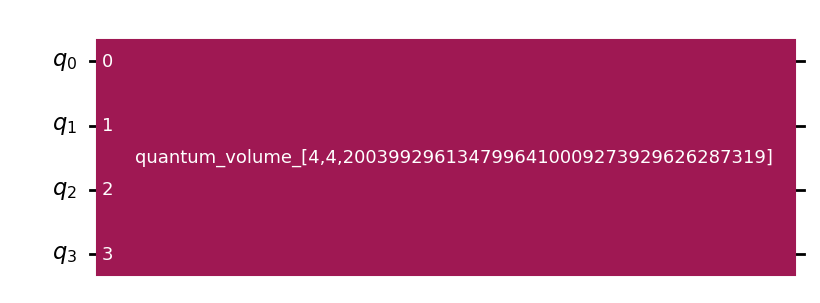

In [7]:
#Using QuantumVolume for circuits
qc=QuantumVolume(4)
display(qc.draw('mpl'))

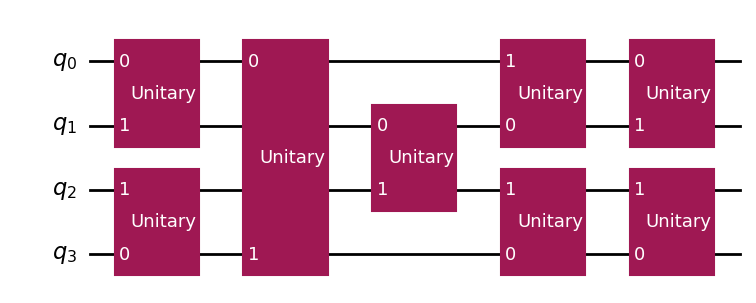

In [8]:
#decompose the box we have above:
qc=qc.decompose()
qc.draw('mpl')

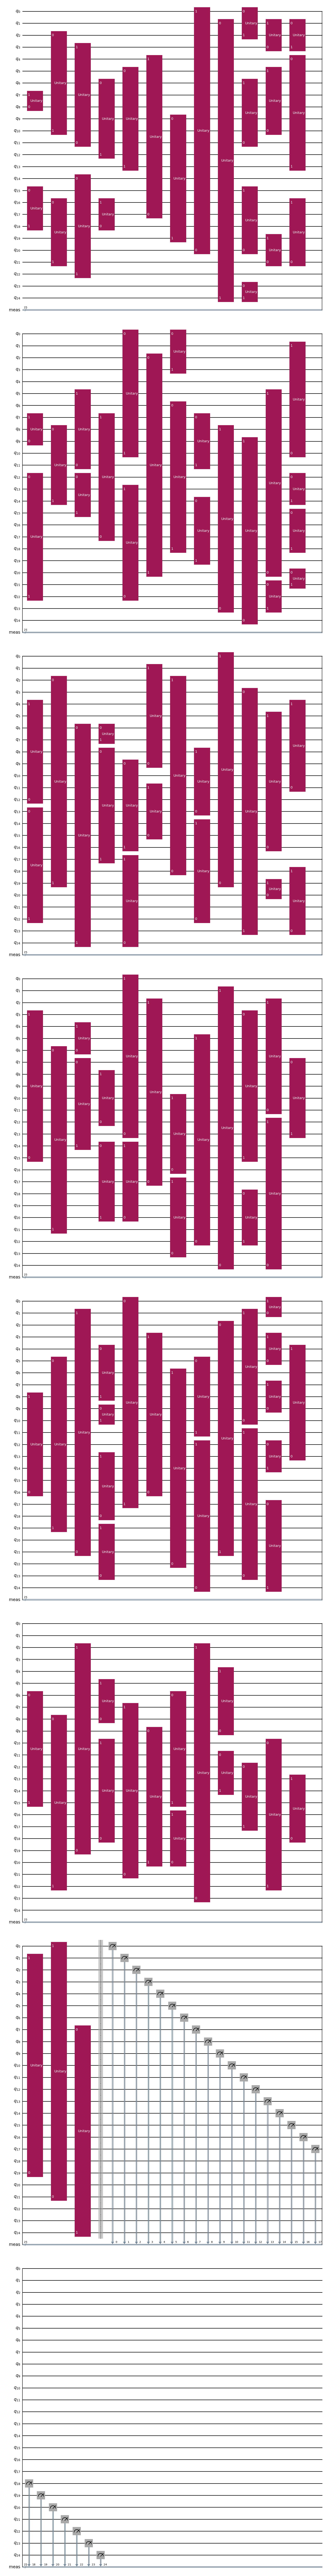

In [10]:
#we observd that it define a lot of gates to make this circuit this big
#Now defining an object as simulator
sim=AerSimulator(method='statevector') # since we're not working with noise, choose method as statevector, if having noise using density matrix is needed
shots=100
depth=10
qubits=25
#building a huge circuit here, having it transpiled
qc=transpile(QuantumVolume(qubits,depth,seed=42),backend=sim,optimization_level=0)
 #having random results,seed still make results random,but by detrmining seed, we get to repeat the result
#optimization_level have 4 values: 0,1,2,3 having it as 1 which is by default , having it as 0 means it doesn't optimize your circuit
# Not optimizing it (0) cause having a circuit with depth,1 means melo-optimize it, 2 means good optimization, 3 means great optimization
# increase optimization level make it take longer, but work faster eventually
#Now I wanna make my circuit as challenging as possible, so no optimization here:
qc.measure_all()
qc.draw('mpl')

In [13]:
%%time
result=sim.run(qc,shots=1024).result()
counts_CPU=result.get_counts()
print(counts_CPU)

{'0001111111111111101101110': 1, '0010000000001010001100011': 1, '1000010110110011000101010': 1, '0000000001010100110101001': 1, '1001010010010001110010101': 1, '1011001001100001010100010': 1, '0100110000101010010011001': 1, '0111110101101110000011111': 1, '1100101101101000010110110': 1, '0110111110010000100111100': 1, '1101001101011000100001110': 1, '0101001110101100010111111': 1, '1010001010001001000001110': 1, '1101100110100101111101111': 1, '1010011001111001010110010': 1, '1110000111010101011100100': 1, '1010000000111000001001000': 1, '0001100010111110110000100': 1, '0001101101110001000110011': 1, '1010111011110001001001111': 1, '1011101111101011111011010': 1, '1101111001101001001100110': 1, '0010010000001101011011111': 1, '0101010111111101111101000': 1, '0100101101000011010101110': 1, '0000110010100100101001101': 1, '1011001010111000010111011': 1, '1011110000000110010011000': 1, '0101100101110001100001001': 1, '1011101110101110001000100': 1, '0101010101011011010010000': 1, '001100

In [14]:
sim=AerSimulator(method='statevector',device='GPU') #simulator will use GPU from now on
qc=transpile(QuantumVolume(qubits,depth,seed=42),backend=sim,optimization_level=0)
qc.measure_all()


In [15]:
%%time
result=sim.run(qc,shots=1024).result()
counts_GPU=result.get_counts()
print(counts_GPU)

{'0000101101010011011001100': 1, '0111001010000001110001111': 1, '0110011101000101001011010': 1, '1100110011101010100001010': 1, '0111011000010010111011100': 1, '0000001111100001011011010': 1, '1100101101101101001011111': 1, '1111111111111100000001101': 1, '1010011011101101001110011': 1, '1010110110001011110011111': 1, '1110100010011101111111101': 1, '1101101110101100011101100': 1, '1111101000011000111001101': 1, '0011101111110101011011011': 1, '0010101001101110010100000': 1, '1000111000111001110101011': 1, '1010110001010011101000100': 1, '0001011101100101010010111': 1, '0001000101111101110101111': 1, '0111000110100110011100011': 1, '1101101100000001110011110': 1, '0100110100101011110100000': 1, '1100011011100100110101010': 1, '1110111011001001111011100': 1, '1100010010010111100010110': 1, '0011101110110010011100010': 1, '0111101110100001000001101': 1, '0100011111000110000001100': 1, '0011010001001000001101010': 1, '1001001011100010001010000': 1, '1010010001101010011010111': 1, '011100

In [16]:
#using cuQuantum library to make it faster by seting:cuStateVec_enable=True
sim=AerSimulator(method='statevector',device='GPU',cuStateVec_enable=True) #simulator will use GPU from now on
qc=transpile(QuantumVolume(qubits,depth,seed=42),backend=sim,optimization_level=0)
qc.measure_all()


In [17]:
%%time
result=sim.run(qc,shots=1024).result()
counts_cuQuantum=result.get_counts()
print(counts_cuQuantum)

{'1000111101010001100000100': 1, '0111111010001111000101001': 1, '1100110110000100101110000': 1, '1010000010000001111011110': 1, '0011001000000110010011001': 1, '0110001001110101100100001': 1, '0111000000011001111111111': 1, '0110100010011111111101111': 1, '1111010000011101001111001': 1, '1100111101111010110010100': 1, '0010001111010000010101100': 1, '1100111011111100110101010': 1, '0111000111101100000101010': 1, '0110000011111101111001000': 1, '1101000101111011111001100': 1, '1001010011011110011111010': 1, '0101111101000010001010101': 1, '0010000001000100011011001': 1, '1010110111010110000011010': 1, '1000001111000000010110100': 1, '1011001001011011110011101': 1, '1100001000011100101010101': 1, '1100101011110101011000010': 1, '1011000001010000101100000': 1, '1000110101001111011100110': 1, '0000011001100001100100111': 1, '1001000001010010000010110': 1, '1010100000100001110111011': 1, '0100010011101000001101011': 1, '0011101100000011101010100': 1, '0000110101100101100111101': 1, '101010